In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [24]:
df = pd.read_csv(r'C:\Users\aacjp\OneDrive\Desktop\data\tables\bigml_59c28831336c6604c800002a.csv')
df = df.drop(['phone number', 'account length', 'area code'], axis='columns')
df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
Northwest = ['WA', 'OR', 'ID', 'MT', 'WY']
Southwest = ['CA', 'NV', 'UT', 'CO', 'AZ', 'NM']
Midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH']
Northeast = ['ME', 'NH', 'VT', 'CT', 'RI', 'NJ', 'MD', 'DE', 'NY', 'WV', 'PA', 'MA', 'DC']
Southeast = ['TX', 'OK', 'AR', 'LA', 'MS', 'TN', 'KY', 'VA', 'NC', 'SC', 'GA', 'FL', 'AL']
Noncontinental = ['AK', 'HI']
regions = []
nw = 0
for i in range(len(df)):
    if df.loc[i]['state'] in Northwest:
        regions.append('Northwest')
    if df.loc[i]['state'] in Southwest:
        regions.append('Southwest')
    if df.loc[i]['state'] in Midwest:
        regions.append('Midwest')
    if df.loc[i]['state'] in Northeast:
        regions.append('Northeast')
    if df.loc[i]['state'] in Southeast:
        regions.append('Southeast')
    if df.loc[i]['state'] in Noncontinental:
        regions.append('Noncontinental')
    #else:
        #regions.append('Noncontinental')

In [26]:
df['region'] = regions
df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,Midwest
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,Midwest
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,Northeast
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,Midwest
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,Southeast


# Question 1: What are the average day calls by region for churn customers?Compare these to non-churn customers


## Answer: 
Although there is no major difference, churn customers made fewer calls than retained customers in the Northwest and Southwest however retention and calls stayed the same in the Southeast and Midwest

## Conclusion: 
Pay somewhat closer attention to customer's calls in the Western US as many churn customers there make slightly fewer day calls

In [27]:
regions = np.unique(df['region'])
churn_averages = []
averages = []

for i in range(len(regions)):
    churn_averages.append(round(np.mean(df.loc[df['region'] == np.unique(df['region'])[i]].loc[df.loc[df['region'] == np.unique(df['region'])[i]]['churn']==True]['total day calls'])))
    averages.append(round(np.mean(df.loc[df['region'] == np.unique(df['region'])[i]].loc[df.loc[df['region'] == np.unique(df['region'])[i]]['churn']==False]['total day calls'])))

C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



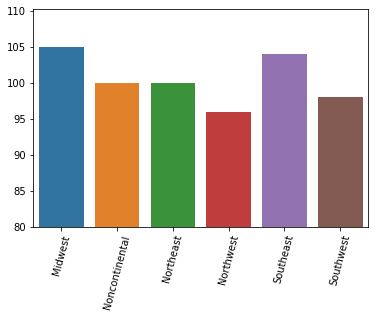

In [28]:
sns.barplot(regions, churn_averages)
plt.xticks(rotation=75)
plt.ylim(80)
plt.show()

C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



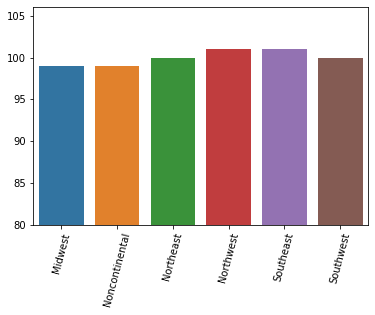

In [29]:
sns.barplot(regions, averages)
plt.xticks(rotation=75)
plt.ylim(80)
plt.show()

# Question 2:
## What is the relationship between total charge and total minutes. is there a linear relationship between these variables? Do your findings reveal a unit price for call time?

## Answer:
The results clearly show that the cost of call time is a fixed rate. Costing 17 cents an hour during the day, 9 cents an hour in the evening, and 5 cents an hour at night

## Conclusion:

This was helpful for myself in the context of understanding the data, but wouldn't be very helpful to the company as they are likley alredy aware of this.

In [30]:
x1 = df['total day minutes']
y1 = df['total day charge']
x2 = df['total eve minutes']
y2 = df['total eve charge']
x3 = df['total night minutes']
y3 = df['total night charge']

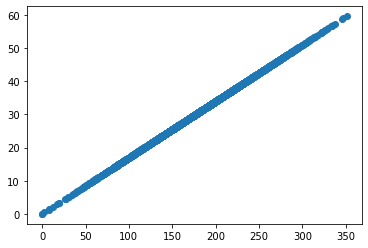

In [31]:
plt.scatter(x1, y1)

In [32]:
mod = LinearRegression(fit_intercept=False).fit(np.array(x1).reshape(-1,1), y1)
print('${} / minute'.format(round(mod.coef_[0],2)))

$0.17 / minute


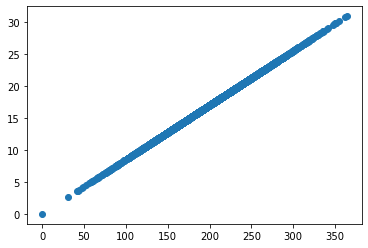

In [33]:
plt.scatter(x2, y2)

In [34]:

mod = LinearRegression(fit_intercept=False).fit(np.array(x2).reshape(-1,1), y2)
print('${} / minute'.format(round(mod.coef_[0],2)))

$0.09 / minute


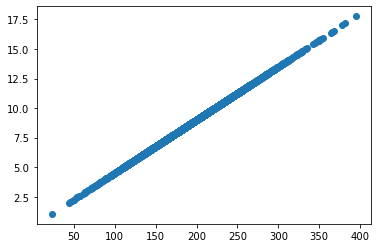

In [35]:
plt.scatter(x3, y3)

In [36]:
mod = LinearRegression(fit_intercept=False).fit(np.array(x3).reshape(-1,1), y3)
print('${} / minute'.format(round(mod.coef_[0],2)))

$0.05 / minute


In [37]:
totals = []
avg_len = []
for i in range(len(df)):
    tc = df['total day calls'][i] + df['total eve calls'][i] + df['total night calls'][i]
    tm = df['total day minutes'][i] + df['total eve minutes'][i] + df['total night minutes'][i]
    totals.append(tc)
    avg_len.append(tc/ tm)

In [38]:
pct = []
pct2 = []
for i in range(len(df)):
    pct.append(round((df['total night calls'][i]/totals[i])*100))
    pct2.append(round((df['total eve calls'][i]/totals[i])*100))
    
df['%night'] = pct
df['%eve'] = pct2
df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region,%night,%eve
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,Midwest,30,33
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,Midwest,31,31
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,Northeast,32,34
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,Midwest,36,35
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,Southeast,34,34


In [39]:
print('{}% of calls made to the average churn customer were at night'.format(round(np.mean(df.loc[df['churn'] == True]['%night']))))
print('{}% of calls made to the average churn customer were in the evening'.format(round(np.mean(df.loc[df['churn'] == True]['%eve']))))

33% of calls made to the average churn customer were at night
33% of calls made to the average churn customer were in the evening


In [40]:
print('{}% of calls made to the average  retained customer were at night'.format(round(np.mean(df.loc[df['churn'] == False]['%night']))))
print('{}% of calls made to the average retained customer were in the evening'.format(round(np.mean(df.loc[df['churn'] == False]['%eve']))))

33% of calls made to the average  retained customer were at night
33% of calls made to the average retained customer were in the evening


In [41]:
np.mean(df['%night']), np.mean(df['%eve'])

(33.32043204320432, 33.284128412841284)

In [42]:
df

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region,%night,%eve
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,Midwest,30,33
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,Midwest,31,31
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,Northeast,32,34
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,Midwest,36,35
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,Southeast,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,no,yes,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,Southwest,29,44
3329,WV,no,no,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,Northeast,52,23
3330,RI,no,no,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,Northeast,35,22
3331,CT,yes,no,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,Northeast,42,26


In [43]:
df['avg duration'] = avg_len
df.describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,%night,%eve,avg duration
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,33.320432,33.284128,0.530187
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,5.493251,5.518221,0.107447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.270735
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,30.000000,30.000000,0.455397
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,33.000000,33.000000,0.517213
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,37.000000,37.000000,0.588465
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,55.000000,60.000000,1.279070


In [44]:
df.loc[df['churn']==True].describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,%night,%eve,avg duration
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814,33.238095,33.302277,0.500007
std,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275,5.576629,5.590424,0.109021
min,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000,19.000000,17.000000,0.270735
25%,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000,29.000000,30.000000,0.422051
50%,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000,33.000000,33.000000,0.478745
75%,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000,37.000000,37.000000,0.565433
max,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000,49.000000,60.000000,0.965672


In [45]:
df.loc[df['churn']==False].describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,%night,%eve,avg duration
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825,33.334386,33.281053,0.535302
std,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883,5.479863,5.506876,0.106352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.291608
25%,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000,30.000000,30.000000,0.461500
50%,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000,33.000000,33.000000,0.522229
75%,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000,37.000000,37.000000,0.590656
max,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000,55.000000,56.000000,1.279070


# Some big differences I'm noticing...

1. average vmail messages is 60% higher in retained customers
2. average total calltime in the day is almost 20% longer in churn customers, but more or less the same in the evening and night

C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



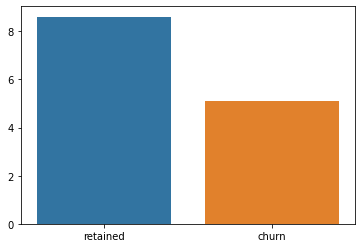

In [46]:
retained = np.mean(df.loc[df['churn']==0]['number vmail messages'])
churn = np.mean(df.loc[df['churn']==1]['number vmail messages'])
X = ['retained', 'churn']
y = [retained, churn]
sns.barplot(X, y)
plt.show()

C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



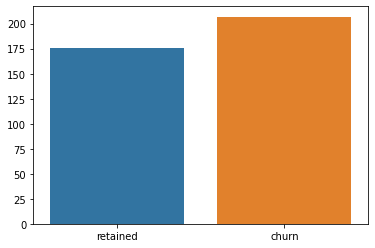

In [47]:
retained = np.mean(df.loc[df['churn']==0]['total day minutes'])
churn = np.mean(df.loc[df['churn']==1]['total day minutes'])
X = ['retained', 'churn']
y = [retained, churn]
sns.barplot(X, y)
plt.show()

In [48]:
df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region,%night,%eve,avg duration
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,...,11.01,10.0,3,2.70,1,False,Midwest,30,33,0.424208
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,11.45,13.7,3,3.70,1,False,Midwest,31,31,0.538021
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,...,7.32,12.2,5,3.29,0,False,Northeast,32,34,0.622155
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,8.86,6.6,7,1.78,2,False,Midwest,36,35,0.444285
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,8.41,10.1,3,2.73,3,False,Southeast,34,34,0.709305


In [49]:
df = df.drop(['state'], axis='columns')
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region,%night,%eve,avg duration
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,False,Midwest,30,33,0.424208
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,False,Midwest,31,31,0.538021
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,False,Northeast,32,34,0.622155
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,False,Midwest,36,35,0.444285
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,False,Southeast,34,34,0.709305


In [50]:
IP = []
VMP = []
C = []
for i in range(len(df)):
    if df.loc[i]['international plan'] == 'yes':
        IP.append(1)
    if df.loc[i]['international plan'] == 'no':
        IP.append(0)
    if df.loc[i]['voice mail plan'] == 'yes':
        VMP.append(1)
    if df.loc[i]['voice mail plan'] == 'no':
        VMP.append(0)
    if df.loc[i]['churn'] == True:
        C.append(1)
    if df.loc[i]['churn'] == False:
        C.append(0)
        
df['international plan'] = IP
df['voice mail plan'] = VMP
df['churn'] = C
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region,%night,%eve,avg duration
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,Midwest,30,33,0.424208
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,Midwest,31,31,0.538021
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,Northeast,32,34,0.622155
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,Midwest,36,35,0.444285
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,Southeast,34,34,0.709305


In [51]:
df

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,region,%night,%eve,avg duration
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,Midwest,30,33,0.424208
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,Midwest,31,31,0.538021
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,Northeast,32,34,0.622155
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,Midwest,36,35,0.444285
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,Southeast,34,34,0.709305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,0,Southwest,29,44,0.439459
3329,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,0,Northeast,52,23,0.408128
3330,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,0,Northeast,35,22,0.390023
3331,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,...,6.26,5.0,10,1.35,2,0,Northeast,42,26,0.635973


In [52]:
feature = np.array(df['region']).reshape(-1, 1)
enc = pd.DataFrame(OneHotEncoder().fit(feature).transform(feature).toarray())
enc.columns = list(np.unique(df['region']))
enc.head()

,Midwest,Noncontinental,Northeast,Northwest,Southeast,Southwest
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
df = df.drop(['region'], axis='columns')
df2 = pd.concat([df, enc], axis='columns')
df2.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,churn,%night,%eve,avg duration,Midwest,Noncontinental,Northeast,Northwest,Southeast,Southwest
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,30,33,0.424208,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,31,31,0.538021,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,32,34,0.622155,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,36,35,0.444285,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,34,34,0.709305,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
newdf = df2.to_csv('ChurnData_ForML.csv')

# Question4: 
How long is the average day call for churn customers as opposed to retained customers?

## Conclusion:
the average day call is 32 seconds for retained customers and 30 seconds for churn customers, this difference is negligeble

In [55]:
np.mean(df2.loc[df2['churn']==0]['avg duration'])

0.5353015392836357

In [56]:
np.mean(df2.loc[df2['churn']==1]['avg duration'])

0.5000068433204556

In [57]:
df2.describe()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,churn,%night,%eve,avg duration,Midwest,Noncontinental,Northeast,Northwest,Southeast,Southwest
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,0.144914,33.320432,33.284128,0.530187,0.240624,0.031503,0.264626,0.108611,0.245425,0.109211
std,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,0.352067,5.493251,5.518221,0.107447,0.427527,0.174699,0.441200,0.311197,0.430403,0.311950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,13.000000,0.000000,0.270735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,30.000000,30.000000,0.455397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,33.000000,33.000000,0.517213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,37.000000,37.000000,0.588465,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,...,1.000000,55.000000,60.000000,1.279070,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Question 5:

What features are strongly correlated with churn, what are these features strongly correlated with and what can we learn from this?

## Conclusion:

customer service calls are the strongest correlated with churn. If a customer has to make multiple customer service calls it is a big sign they may leave the service, 56% of customers who leave make 2 or more customer service calls. For this reason employees should make providing quality customer support a priority. Customer service calls are very weakly correleated with all other features.

In [58]:
df2.corr()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,churn,%night,%eve,avg duration,Midwest,Noncontinental,Northeast,Northwest,Southeast,Southwest
international plan,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,...,0.259852,0.004709,0.004269,-0.011632,0.010151,-0.018438,0.019601,-0.019822,0.001715,-0.013901
voice mail plan,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,...,-0.102148,0.021317,-0.008870,-0.009224,0.020625,0.007503,-0.012142,-0.006767,-0.000439,-0.007940
number vmail messages,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,...,-0.089728,0.012382,-0.005212,-0.011200,0.021877,0.004719,-0.006626,-0.018730,-0.002139,-0.001619
total day minutes,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,...,0.205151,0.010055,-0.002116,-0.479573,0.031992,-0.008654,0.002500,-0.013980,-0.008820,-0.016419
total day calls,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,...,0.018459,-0.433488,-0.399875,0.321780,-0.009878,-0.012219,-0.010380,-0.005368,0.034941,-0.007794
total day charge,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,...,0.205151,0.010054,-0.002116,-0.479577,0.031999,-0.008667,0.002509,-0.013983,-0.008824,-0.016425
total eve minutes,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,...,0.092796,0.021954,-0.003873,-0.464189,0.018775,-0.046715,-0.007156,0.003281,0.006766,-0.002057
total eve calls,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,...,0.009233,-0.403895,0.811825,0.329848,0.027460,-0.021644,-0.026592,-0.032113,0.035753,-0.005197
total eve charge,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,...,0.092786,0.021957,-0.003872,-0.464171,0.018757,-0.046728,-0.007154,0.003282,0.006787,-0.002057
total night minutes,-0.028905,0.006079,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,...,0.035493,0.000087,-0.015659,-0.437959,0.019351,-0.009979,0.030045,-0.007305,-0.019751,-0.028887


C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



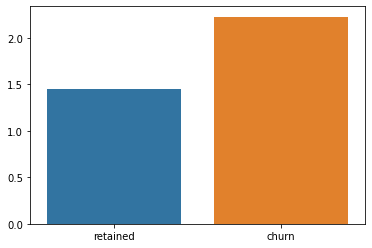

In [59]:
retained = np.mean(df2.loc[df2['churn']==0]['customer service calls'])
churn = np.mean(df2.loc[df2['churn']==1]['customer service calls'])
X = ['retained', 'churn']
y = [retained, churn]
sns.barplot(X, y)
plt.show()

In [60]:
churn = df2.loc[df['churn']==1]
result = len(churn.loc[churn['customer service calls']>=2])/len(churn)
print('{}% of churn customers make 2 or more customer service calls a month'.format(round(result*100,1)))

55.7% of churn customers make 2 or more customer service calls a month


In [61]:
retained = df2.loc[df['churn']==0]
result = len(retained.loc[retained['customer service calls']>=2])/len(retained)
print('{}% of retained customers make 2 or more customer service calls a month'.format(round(result*100,1)))

41.6% of retained customers make 2 or more customer service calls a month
